In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
#Here we imported the libraries which are to be used for the Web Scraping.

In [11]:
url = ""
page = requests.get(url)
page

MissingSchema: Invalid URL '': No scheme supplied. Perhaps you meant http://?

<Response [403]>

In [5]:
 url=f"https://www.imdb.com/search/title/?title_type=tv_series&num_votes=1000,&genres=animation&sort=user_rating,desc&start={i}&ref_=adv_nxt"
print(url)
    headers = {"Accept-Language": "en-US,en;q=0.9"}
    page = requests.get(url,headers=headers)
    soup = BeautifulSoup(page.text)

    

IndentationError: unexpected indent (4101824364.py, line 2)

In [6]:
title=[]
start_year=[]
end_year=[]
rating=[]
genre=[]
runtime=[]
casting=[]
votes=[]
certificate=[]

#using for loop to extract the data through range.

for i in range(1,500,50):
    url=f"https://www.imdb.com/search/title/?title_type=tv_series&num_votes=1000,&genres=animation&sort=user_rating,desc&start={i}&ref_=adv_nxt"
    print(url)
    headers = {"Accept-Language": "en-US,en;q=0.9"}
    page = requests.get(url,headers=headers)
    soup = BeautifulSoup(page.text)

#titles

    titles=soup.find_all("h3",class_="lister-item-header")

    for i in titles:
        a=i.text
        t_=a.split('\n')[2]
        if t_:
            title.append(t_)
        else:
            title.append(np.nan)
            
#certificate 

    c=soup.find_all('span',class_='certificate')

    for i in c:
        d=i.text
        certificate.append(d)

#start year

    d=soup.find_all('span',class_="lister-item-year text-muted unbold")

    for i in d:
        b=i.text
        c=re.findall(r'\W(\d+)\W',b)
        start_year.append(c)

#end year

    d=soup.find_all('span',class_="lister-item-year text-muted unbold")

    for i in d:
        b=re.findall(r'\W\d+\W(\d+)|\W(\s)\W',i.text)
        end_year.append(b)

#rating

    r=soup.find_all('div',class_="inline-block ratings-imdb-rating")
    
    for i in r:
        b=i.text
        rating.append(b.split('\n')[2])
        
#genre

    g=soup.find_all('span',class_="genre")

    for i in g:
        d=i.text
        a=re.findall(r'\W+(\w+)',d)
        genre.append(a)
        
#runtime

    h=soup.find_all('span',class_="runtime")
    for i in h:
        e=i.text
        runtime.append(e)
        
#casting  

    l=soup.find_all('p',class_="")

    for i in l:
        l=i.text
        casting.append(l)
        
#votes

    j=soup.find_all('p',class_="sort-num_votes-visible")

    for i in j:
        e=i.text
        votes.append(e.split('\n')[2])
#This code scrappes the data from the Url/Website within the given range i.e we have given a range (1,500,50) 
#We have placed some empty list with assigning to each of the column names with command "append"

https://www.imdb.com/search/title/?title_type=tv_series&num_votes=1000,&genres=animation&sort=user_rating,desc&start=1&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=tv_series&num_votes=1000,&genres=animation&sort=user_rating,desc&start=51&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=tv_series&num_votes=1000,&genres=animation&sort=user_rating,desc&start=101&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=tv_series&num_votes=1000,&genres=animation&sort=user_rating,desc&start=151&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=tv_series&num_votes=1000,&genres=animation&sort=user_rating,desc&start=201&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=tv_series&num_votes=1000,&genres=animation&sort=user_rating,desc&start=251&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=tv_series&num_votes=1000,&genres=animation&sort=user_rating,desc&start=301&ref_=adv_nxt
https://www.imdb.com/search/title/?title_type=tv_series&num_votes

Below Here we will be using " len() " to check if its suitable for DataFrame with all arrays of same length.

In [3]:
len(runtime)
len(certificate)
len(genre)
len(rating)
len(casting)
len(end_year)
len(votes)
len(certificate)
len(start_year)
len(title)
#This displays the total number of data present in each 

0

In [4]:
d = {"Titles":title,
    "Start year":start_year,
    "Rating":rating,
    "Genre":genre,
    "Runtime (min)":runtime,
    "Casting":casting,
    "Votes":votes,
    "Certificate":certificate}
#Here we are giving the names for the columns with thier respective list's.

In [5]:
df=pd.DataFrame(d)
df
#This gives us the DataFrame of the data we've Scrapped. 

,Titles,Start year,Rating,Genre,Runtime (min),Casting,Votes,Certificate


In [405]:
import pandas as pd


duplicates = df.duplicated('Titles')
duplicate_rows = df[duplicates]
num_duplicates = duplicate_rows.shape[0]

print("Duplicate rows:")
print(duplicate_rows)
print("Number of duplicates:", num_duplicates)

#checking for duplicates

Duplicate rows:
                           Titles Start year Rating  \
28                  Dragon Ball Z     [1989]    8.8   
58                    Dragon Ball     [1995]    8.6   
60                Hunter x Hunter     [1999]    8.6   
285                      Doraemon     [1979]    8.1   
315                     DuckTales     [1987]    8.0   
352                      Doraemon     [1973]    8.0   
360  Teenage Mutant Ninja Turtles     [1987]    7.9   
391               Captain Tsubasa     [1983]    7.9   
395                 Fruits Basket     [2001]    7.9   
411                       Ranma ½     [1989]    7.9   
422  Teenage Mutant Ninja Turtles     [2003]    7.8   
435                    Animaniacs     [2020]    7.8   
436                   Thundercats     [2011]    7.8   

                              Genre Runtime (min)  \
28   [Animation, Action, Adventure]        24 min   
58   [Animation, Action, Adventure]        24 min   
60   [Animation, Action, Adventure]        24 min   
2

In [6]:
df.isnull().sum()
#we are checking if there are any null values present in the DataFrame.

Titles           0.0
Start year       0.0
Rating           0.0
Genre            0.0
Runtime (min)    0.0
Casting          0.0
Votes            0.0
Certificate      0.0
dtype: float64

In [7]:
df['Runtime (min)'] = df['Runtime (min)'].replace('Nan', df['Runtime (min)'].mode()[0])
df
#replaces the Nan values

KeyError: 0

In [8]:
df

,Titles,Start year,Rating,Genre,Runtime (min),Casting,Votes,Certificate


In [9]:
df.isnull().sum()
#checking if there any null values or not.

Titles           0.0
Start year       0.0
Rating           0.0
Genre            0.0
Runtime (min)    0.0
Casting          0.0
Votes            0.0
Certificate      0.0
dtype: float64

In [10]:
df.to_csv("finalll.csv")
#Converting DataFrame to csv file.

In [11]:
df=pd.read_csv('finalll.csv')
df.drop(columns='Unnamed: 0',inplace=True)
#drops the column named unnamed with "inplace=True" for permanent change.

In [12]:
df.head()
#Head shows first 5 values in the DataFrame.

,Titles,Start year,Rating,Genre,Runtime (min),Casting,Votes,Certificate


In [373]:
df['Runtime (min)'].value_counts()
#The no. of count on runtime.

24 min     150
30 min      76
23 min      76
25 min      62
22 min      44
11 min      16
15 min       9
12 min       7
7 min        6
21 min       6
26 min       5
10 min       5
5 min        3
20 min       3
3 min        2
22 min       2
55 min       2
41 min       2
50 min       2
4 min        1
360 min      1
32 min       1
8 min        1
701 min      1
133 min      1
384 min      1
99 min       1
522 min      1
6 min        1
174 min      1
90 min       1
2 min        1
900 min      1
45 min       1
27 min       1
60 min       1
325 min      1
29 min       1
203 min      1
28 min       1
13 min       1
Name: Runtime (min), dtype: int64

In [13]:
df[df['Titles']=="One Piece"]
#To search for a certain Anime using a particular column and the record it has.

,Titles,Start year,Rating,Genre,Runtime (min),Casting,Votes,Certificate


In [14]:
df['Titles'][108]
#Picking out the title of anime through a index number.

IndexError: index 108 is out of bounds for axis 0 with size 0

In [417]:
l=[]
for i in df['Start year']:
    a=str(i).strip('[]')
    l.append(a)
df['Start year']=l
df['Start year']=df['Start year'].apply(lambda x:x.replace("'",""))
df.head()
#Removing the Square bracket of the records in "Start year" column.

,Titles,Start year,Rating,Genre,Runtime (min),Casting,Votes,Certificate
0,Bluey,2018,9.5,"['Animation', 'Family']",7 min,"\n \n Stars:\nDavid McCormack, \...","16,393",TV-Y
1,Avatar: The Last Airbender,2005,9.3,"['Animation', 'Action', 'Adventure']",23 min,"\n \n Stars:\nDee Bradley Baker,...","334,062",TV-Y7-FV
2,The Big Lez Show,2012,9.2,"['Animation', 'Adventure', 'Comedy']",10 min,"\n \n Stars:\nJarrad Wright, \nT...","1,906",TV-MA
3,Dragon Ball Z Abridged,2008,9.2,"['Animation', 'Action', 'Comedy']",23 min,"\n \n Stars:\nLawrence Simpson, ...","1,250",TV-14
4,Rick and Morty,2013,9.1,"['Animation', 'Adventure', 'Comedy']",24 min,"\n \n Stars:\nJustin Roiland, \n...","555,228",TV-MA


In [418]:
l=[]
for i in df['Genre']:
    a=str(i).strip('[]')
    l.append(a)
df['Genre']=l
df['Genre']=df['Genre'].apply(lambda x:x.replace("'",""))
df.head()
#Removing the Square bracket of the records in "Genre" column.

,Titles,Start year,Rating,Genre,Runtime (min),Casting,Votes,Certificate
0,Bluey,2018,9.5,"Animation, Family",7 min,"\n \n Stars:\nDavid McCormack, \...","16,393",TV-Y
1,Avatar: The Last Airbender,2005,9.3,"Animation, Action, Adventure",23 min,"\n \n Stars:\nDee Bradley Baker,...","334,062",TV-Y7-FV
2,The Big Lez Show,2012,9.2,"Animation, Adventure, Comedy",10 min,"\n \n Stars:\nJarrad Wright, \nT...","1,906",TV-MA
3,Dragon Ball Z Abridged,2008,9.2,"Animation, Action, Comedy",23 min,"\n \n Stars:\nLawrence Simpson, ...","1,250",TV-14
4,Rick and Morty,2013,9.1,"Animation, Adventure, Comedy",24 min,"\n \n Stars:\nJustin Roiland, \n...","555,228",TV-MA


In [419]:
temp=df.Genre.str.split(',',expand=True).iloc[:,0:3]
temp.columns=['Genre1','Genre2','Genre3']
temp.Genre3.fillna(temp.Genre2,inplace=True)
df=pd.concat([df,temp],axis=1)
df.head()
#splitting the genre into 3 

,Titles,Start year,Rating,Genre,Runtime (min),Casting,Votes,Certificate,Genre1,Genre2,Genre3
0,Bluey,2018,9.5,"Animation, Family",7 min,"\n \n Stars:\nDavid McCormack, \...","16,393",TV-Y,Animation,Family,Family
1,Avatar: The Last Airbender,2005,9.3,"Animation, Action, Adventure",23 min,"\n \n Stars:\nDee Bradley Baker,...","334,062",TV-Y7-FV,Animation,Action,Adventure
2,The Big Lez Show,2012,9.2,"Animation, Adventure, Comedy",10 min,"\n \n Stars:\nJarrad Wright, \nT...","1,906",TV-MA,Animation,Adventure,Comedy
3,Dragon Ball Z Abridged,2008,9.2,"Animation, Action, Comedy",23 min,"\n \n Stars:\nLawrence Simpson, ...","1,250",TV-14,Animation,Action,Comedy
4,Rick and Morty,2013,9.1,"Animation, Adventure, Comedy",24 min,"\n \n Stars:\nJustin Roiland, \n...","555,228",TV-MA,Animation,Adventure,Comedy


In [420]:
df.drop(columns=['Genre1','Genre'],inplace=True)
#dropping genre1 and genre2

In [422]:
df

,Titles,Start year,Rating,Runtime (min),Casting,Votes,Certificate,Genre2,Genre3
0,Bluey,2018,9.5,7 min,"\n \n Stars:\nDavid McCormack, \...","16,393",TV-Y,Family,Family
1,Avatar: The Last Airbender,2005,9.3,23 min,"\n \n Stars:\nDee Bradley Baker,...","334,062",TV-Y7-FV,Action,Adventure
2,The Big Lez Show,2012,9.2,10 min,"\n \n Stars:\nJarrad Wright, \nT...","1,906",TV-MA,Adventure,Comedy
3,Dragon Ball Z Abridged,2008,9.2,23 min,"\n \n Stars:\nLawrence Simpson, ...","1,250",TV-14,Action,Comedy
4,Rick and Morty,2013,9.1,24 min,"\n \n Stars:\nJustin Roiland, \n...","555,228",TV-MA,Adventure,Comedy
...,...,...,...,...,...,...,...,...,...
495,Overlord,2015,7.7,30 min,"\n \n Stars:\nSatoshi Hino, \nCh...","11,880",TV-MA,Action,Adventure
496,Calls,2021,7.7,12 min,"\n \n Stars:\nAubrey Plaza, \nCl...","6,359",TV-MA,Drama,Horror
497,Sailor Moon,1992,7.7,30 min,"\n \n Stars:\nStephanie Sheh, \n...","6,937",TV-PG,Action,Adventure
498,Rapunzel's Tangled Adventure,2017,7.7,21 min,"\n \n Stars:\nMandy Moore, \nZac...","3,100",TV-Y7,Action,Adventure


In [423]:
df['Runtime (min)']=df['Runtime (min)'].str.replace('min','')
df.head()
#Removing "min" from the records of column Runtime(min).

,Titles,Start year,Rating,Runtime (min),Casting,Votes,Certificate,Genre2,Genre3
0,Bluey,2018,9.5,7,"\n \n Stars:\nDavid McCormack, \...","16,393",TV-Y,Family,Family
1,Avatar: The Last Airbender,2005,9.3,23,"\n \n Stars:\nDee Bradley Baker,...","334,062",TV-Y7-FV,Action,Adventure
2,The Big Lez Show,2012,9.2,10,"\n \n Stars:\nJarrad Wright, \nT...","1,906",TV-MA,Adventure,Comedy
3,Dragon Ball Z Abridged,2008,9.2,23,"\n \n Stars:\nLawrence Simpson, ...","1,250",TV-14,Action,Comedy
4,Rick and Morty,2013,9.1,24,"\n \n Stars:\nJustin Roiland, \n...","555,228",TV-MA,Adventure,Comedy


In [424]:
df['Casting']=df['Casting'].str.replace('\n','')
df['Casting']=df['Casting'].str.replace('Stars:','')
df.head()
#Replacing the "\n" with empty string for clean data in column "Casting".

,Titles,Start year,Rating,Runtime (min),Casting,Votes,Certificate,Genre2,Genre3
0,Bluey,2018,9.5,7,"David McCormack, Melanie Zanet...","16,393",TV-Y,Family,Family
1,Avatar: The Last Airbender,2005,9.3,23,"Dee Bradley Baker, Zach Tyler ...","334,062",TV-Y7-FV,Action,Adventure
2,The Big Lez Show,2012,9.2,10,"Jarrad Wright, Tom Hollis, Cod...","1,906",TV-MA,Adventure,Comedy
3,Dragon Ball Z Abridged,2008,9.2,23,"Lawrence Simpson, Nick Landis,...","1,250",TV-14,Action,Comedy
4,Rick and Morty,2013,9.1,24,"Justin Roiland, Chris Parnell,...","555,228",TV-MA,Adventure,Comedy


In [425]:
df['Votes']=df['Votes'].str.replace(',','')
df.head()
#Removing the "," from the records of column "Votes".

,Titles,Start year,Rating,Runtime (min),Casting,Votes,Certificate,Genre2,Genre3
0,Bluey,2018,9.5,7,"David McCormack, Melanie Zanet...",16393,TV-Y,Family,Family
1,Avatar: The Last Airbender,2005,9.3,23,"Dee Bradley Baker, Zach Tyler ...",334062,TV-Y7-FV,Action,Adventure
2,The Big Lez Show,2012,9.2,10,"Jarrad Wright, Tom Hollis, Cod...",1906,TV-MA,Adventure,Comedy
3,Dragon Ball Z Abridged,2008,9.2,23,"Lawrence Simpson, Nick Landis,...",1250,TV-14,Action,Comedy
4,Rick and Morty,2013,9.1,24,"Justin Roiland, Chris Parnell,...",555228,TV-MA,Adventure,Comedy


In [426]:
df.rename(columns = {'Genre2':'Genre1','Genre3':'Genre2'}, inplace = True)
df.head()
#Renaming the columns of Genre

,Titles,Start year,Rating,Runtime (min),Casting,Votes,Certificate,Genre1,Genre2
0,Bluey,2018,9.5,7,"David McCormack, Melanie Zanet...",16393,TV-Y,Family,Family
1,Avatar: The Last Airbender,2005,9.3,23,"Dee Bradley Baker, Zach Tyler ...",334062,TV-Y7-FV,Action,Adventure
2,The Big Lez Show,2012,9.2,10,"Jarrad Wright, Tom Hollis, Cod...",1906,TV-MA,Adventure,Comedy
3,Dragon Ball Z Abridged,2008,9.2,23,"Lawrence Simpson, Nick Landis,...",1250,TV-14,Action,Comedy
4,Rick and Morty,2013,9.1,24,"Justin Roiland, Chris Parnell,...",555228,TV-MA,Adventure,Comedy


In [427]:
df.to_csv('Cleaned_data.csv')
df.head()
#Converted this DataFrame into an csv file.

,Titles,Start year,Rating,Runtime (min),Casting,Votes,Certificate,Genre1,Genre2
0,Bluey,2018,9.5,7,"David McCormack, Melanie Zanet...",16393,TV-Y,Family,Family
1,Avatar: The Last Airbender,2005,9.3,23,"Dee Bradley Baker, Zach Tyler ...",334062,TV-Y7-FV,Action,Adventure
2,The Big Lez Show,2012,9.2,10,"Jarrad Wright, Tom Hollis, Cod...",1906,TV-MA,Adventure,Comedy
3,Dragon Ball Z Abridged,2008,9.2,23,"Lawrence Simpson, Nick Landis,...",1250,TV-14,Action,Comedy
4,Rick and Morty,2013,9.1,24,"Justin Roiland, Chris Parnell,...",555228,TV-MA,Adventure,Comedy


In [428]:
df.columns
#inspecting columns.

Index(['Titles', 'Start year', 'Rating', 'Runtime (min)', 'Casting', 'Votes',
       'Certificate', 'Genre1', 'Genre2'],
      dtype='object')

In [176]:
df.info()
#information of dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Titles         400 non-null    object 
 1   Start year     400 non-null    int32  
 2   Rating         392 non-null    float64
 3   Runtime (min)  376 non-null    float64
 4   Casting        400 non-null    object 
 5   Votes          400 non-null    int32  
 6   Certificate    392 non-null    object 
 7   Genre1         400 non-null    object 
 8   Genre2         400 non-null    object 
dtypes: float64(2), int32(2), object(5)
memory usage: 25.1+ KB


In [169]:
df['Start year'] = df['Start year'].astype('int')

In [170]:
df['Rating'] = df['Rating'].fillna(0).astype('float')

df['Rating'] = df['Rating'].replace(0,df['Rating'].mode()[0])

In [171]:
df['Runtime (min)'] = df['Runtime (min)'].fillna(0).astype(int)

df['Runtime (min)'] = df['Runtime (min)'].replace(0,df['Runtime (min)'].mode()[0])

In [172]:
df['Votes'] = df['Votes'].fillna(0).astype(int)

df['Votes'] = df['Votes'].replace(0, df['Votes'].mode()[0]).astype(int)

In [173]:
df['Certificate'] = df['Certificate'].fillna(df['Certificate'].mode()[0])

In [174]:
df.isnull().sum()
#checking null values.

Titles           0
Start year       0
Rating           0
Runtime (min)    0
Casting          0
Votes            0
Certificate      0
Genre1           1
Genre2           1
dtype: int64

In [176]:
df.dtypes
#checking datatypes

Titles            object
Start year         int32
Rating           float64
Runtime (min)      int32
Casting           object
Votes              int32
Certificate       object
Genre1            object
Genre2            object
dtype: object

In [177]:
df.to_csv("finally_csv")

In [430]:
df = pd.read_csv("finally_csv")
df
#cleaned data for data visualization.

,Unnamed: 0,Titles,Start year,Rating,Runtime (min),Casting,Votes,Certificate,Genre1,Genre2
0,0,Bluey,2018,9.5,7,"David McCormack, Melanie Zanet...",16331,TV-Y,Family,Family
1,1,Avatar: The Last Airbender,2005,9.3,23,"Dee Bradley Baker, Zach Tyler ...",333861,TV-Y7-FV,Action,Adventure
2,2,The Big Lez Show,2012,9.2,10,"Jarrad Wright, Tom Hollis, Cod...",1903,TV-MA,Adventure,Comedy
3,3,Dragon Ball Z Abridged,2008,9.2,23,"Lawrence Simpson, Nick Landis,...",1249,TV-14,Action,Comedy
4,4,Rick and Morty,2013,9.1,24,"Justin Roiland, Chris Parnell,...",554944,TV-MA,Adventure,Comedy
...,...,...,...,...,...,...,...,...,...,...
495,495,Calls,2021,7.7,12,"Aubrey Plaza, Clancy Brown, Ni...",6352,TV-MA,Drama,Horror
496,496,Sailor Moon,1992,7.7,30,"Stephanie Sheh, Kotono Mitsuis...",6934,TV-PG,Action,Adventure
497,497,Rapunzel's Tangled Adventure,2017,7.7,21,"Mandy Moore, Zachary Levi, Ede...",3095,TV-Y7,Action,Adventure
498,498,RWBY,2012,7.7,13,"Lindsay Jones, Kara Eberle, Ba...",7327,TV-PG,Action,Adventure


In [431]:
df["Genre"] = df['Genre1'] +","+ df["Genre2"]
df.drop(columns=['Genre1','Genre2'],inplace=True)
df
#Merging both genre 1 and genre 2

,Unnamed: 0,Titles,Start year,Rating,Runtime (min),Casting,Votes,Certificate,Genre
0,0,Bluey,2018,9.5,7,"David McCormack, Melanie Zanet...",16331,TV-Y,"Family, Family"
1,1,Avatar: The Last Airbender,2005,9.3,23,"Dee Bradley Baker, Zach Tyler ...",333861,TV-Y7-FV,"Action, Adventure"
2,2,The Big Lez Show,2012,9.2,10,"Jarrad Wright, Tom Hollis, Cod...",1903,TV-MA,"Adventure, Comedy"
3,3,Dragon Ball Z Abridged,2008,9.2,23,"Lawrence Simpson, Nick Landis,...",1249,TV-14,"Action, Comedy"
4,4,Rick and Morty,2013,9.1,24,"Justin Roiland, Chris Parnell,...",554944,TV-MA,"Adventure, Comedy"
...,...,...,...,...,...,...,...,...,...
495,495,Calls,2021,7.7,12,"Aubrey Plaza, Clancy Brown, Ni...",6352,TV-MA,"Drama, Horror"
496,496,Sailor Moon,1992,7.7,30,"Stephanie Sheh, Kotono Mitsuis...",6934,TV-PG,"Action, Adventure"
497,497,Rapunzel's Tangled Adventure,2017,7.7,21,"Mandy Moore, Zachary Levi, Ede...",3095,TV-Y7,"Action, Adventure"
498,498,RWBY,2012,7.7,13,"Lindsay Jones, Kara Eberle, Ba...",7327,TV-PG,"Action, Adventure"


In [180]:
df.dtypes

Unnamed: 0         int64
Titles            object
Start year         int64
Rating           float64
Runtime (min)      int64
Casting           object
Votes              int64
Certificate       object
Genre1            object
Genre2            object
dtype: object

In [181]:
df.isnull().sum()

Unnamed: 0       0
Titles           0
Start year       0
Rating           0
Runtime (min)    0
Casting          3
Votes            0
Certificate      0
Genre1           1
Genre2           1
dtype: int64

In [182]:
df.isnull().sum()

Unnamed: 0       0
Titles           0
Start year       0
Rating           0
Runtime (min)    0
Casting          3
Votes            0
Certificate      0
Genre1           1
Genre2           1
dtype: int64

# DATA VISUALIZATION

In [433]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.express as px
# needed libraries.

In [ ]:
ort pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import requests
from bs4 import BeautifulSoup
import re

In [293]:
df = pd.read_csv("finally_csv")

df.drop(columns='Unnamed: 0',inplace=True)
df.head()
#getting cleaned data "finally_csv" for data visualization.

,Titles,Start year,Rating,Runtime (min),Casting,Votes,Certificate,Genre1,Genre2
0,Bluey,2018,9.5,7,"David McCormack, Melanie Zanet...",16331,TV-Y,Family,Family
1,Avatar: The Last Airbender,2005,9.3,23,"Dee Bradley Baker, Zach Tyler ...",333861,TV-Y7-FV,Action,Adventure
2,The Big Lez Show,2012,9.2,10,"Jarrad Wright, Tom Hollis, Cod...",1903,TV-MA,Adventure,Comedy
3,Dragon Ball Z Abridged,2008,9.2,23,"Lawrence Simpson, Nick Landis,...",1249,TV-14,Action,Comedy
4,Rick and Morty,2013,9.1,24,"Justin Roiland, Chris Parnell,...",554944,TV-MA,Adventure,Comedy


In [294]:
df.columns
#columns check

Index(['Titles', 'Start year', 'Rating', 'Runtime (min)', 'Casting', 'Votes',
       'Certificate', 'Genre1', 'Genre2'],
      dtype='object')

In [295]:
df

,Titles,Start year,Rating,Runtime (min),Casting,Votes,Certificate,Genre1,Genre2
0,Bluey,2018,9.5,7,"David McCormack, Melanie Zanet...",16331,TV-Y,Family,Family
1,Avatar: The Last Airbender,2005,9.3,23,"Dee Bradley Baker, Zach Tyler ...",333861,TV-Y7-FV,Action,Adventure
2,The Big Lez Show,2012,9.2,10,"Jarrad Wright, Tom Hollis, Cod...",1903,TV-MA,Adventure,Comedy
3,Dragon Ball Z Abridged,2008,9.2,23,"Lawrence Simpson, Nick Landis,...",1249,TV-14,Action,Comedy
4,Rick and Morty,2013,9.1,24,"Justin Roiland, Chris Parnell,...",554944,TV-MA,Adventure,Comedy
...,...,...,...,...,...,...,...,...,...
495,Calls,2021,7.7,12,"Aubrey Plaza, Clancy Brown, Ni...",6352,TV-MA,Drama,Horror
496,Sailor Moon,1992,7.7,30,"Stephanie Sheh, Kotono Mitsuis...",6934,TV-PG,Action,Adventure
497,Rapunzel's Tangled Adventure,2017,7.7,21,"Mandy Moore, Zachary Levi, Ede...",3095,TV-Y7,Action,Adventure
498,RWBY,2012,7.7,13,"Lindsay Jones, Kara Eberle, Ba...",7327,TV-PG,Action,Adventure


# Data Vis


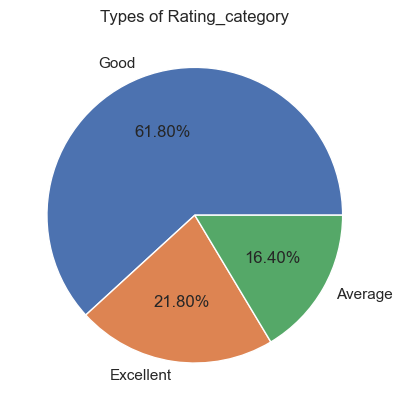

In [296]:
def rating(rating):
    if rating>=8.5:
        return 'Excellent'
    elif rating>=7.9:
        return 'Good'
    else:
        return 'Average'
    
df['rating_cat']=df['Rating'].apply(rating)

a=df['rating_cat'].value_counts()
plt.pie(a,labels=a.index,autopct='%0.2f%%')
plt.title('Types of Rating_category')
plt.show()

In [193]:
# Univariant : 
# In the above picture we have used matplotlib library i.e  pie chart above
# It shows the percentage distribution of Rating Category based on Ratings.

In [434]:
px.bar(df['Certificate'].value_counts(),title='Types of Certifiates')

In [435]:
px.bar(df['Certificate'].value_counts(),title='Types of Anime')

In [195]:
# Univariant : 
# In the above picture we have used plotly library i.e bar  above
# It shows the types of certificates and its densities.
# Tv-14: shows may be unsuitable for children under 14, TV-MA: Mature audiences,TV-PG:Parental guidance
# Tv-Y7:designed for chil- dren ages 7 and older,TV-G:Television Guardian

In the above plot we are showing the different Certificate counts in our Series dataframe

In [1]:
sns.histplot(df['Runtime (min)'])
plt.show()

NameError: name 'sns' is not defined

In [200]:
df['Runtime (min)'].value_counts()
#count of number of runtimes with runtime

24     150
30      76
23      76
25      62
22      46
11      16
15       9
12       7
7        6
21       6
26       5
10       5
5        3
20       3
3        2
55       2
41       2
50       2
32       1
360      1
4        1
522      1
8        1
701      1
133      1
174      1
99       1
384      1
6        1
90       1
2        1
900      1
45       1
27       1
60       1
325      1
29       1
203      1
28       1
13       1
Name: Runtime (min), dtype: int64

C:\Users\vamsi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



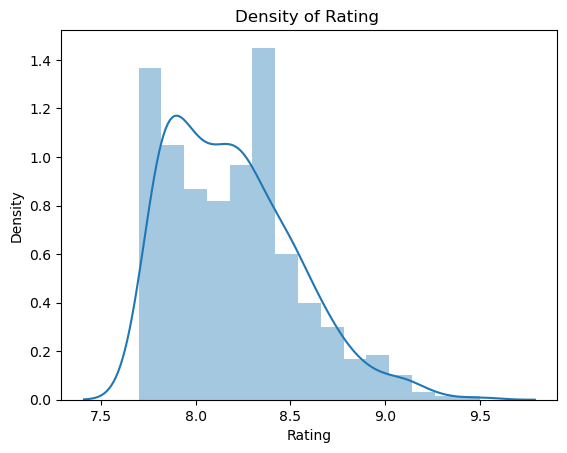

In [201]:
sns.distplot(df['Rating'])
plt.title('Density of Rating ')
plt.show()
#in the below plot it shows the density of ratings started over rating

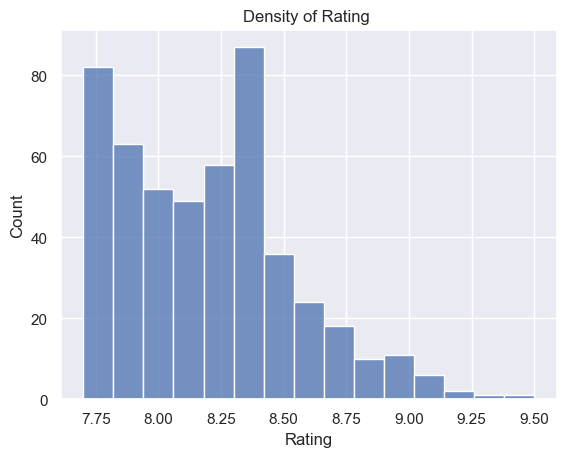

In [289]:
sns.histplot(df['Rating'])
plt.title('Density of Rating ')
plt.show()
#density of rating according to their ratings from start to end.

In [203]:
# Univariant : 
# In the above picture we have used Seaborn library i.e distplot  above
# It shows the types of Rating and its densities.
# the density is more between 7.7 to 9.5

In [436]:
df['Genre'].value_counts().head(10)
#count of genre in dataframe.

 Action, Adventure    183
 Comedy, Drama         50
 Adventure, Comedy     42
 Action, Comedy        27
 Comedy, Comedy        19
 Action, Drama         15
 Adventure, Drama      14
 Short, Adventure      13
 Comedy, Family        12
 Comedy, Fantasy       11
Name: Genre, dtype: int64

In [438]:
#px.bar(df['Genre'].value_counts().head(10),title='Types of Genre')


In [295]:
#Univariant : 
# In the above pictures we have used plotly library i.e bar  above
# It shows the number of Genre and its counts

C:\Users\vamsi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



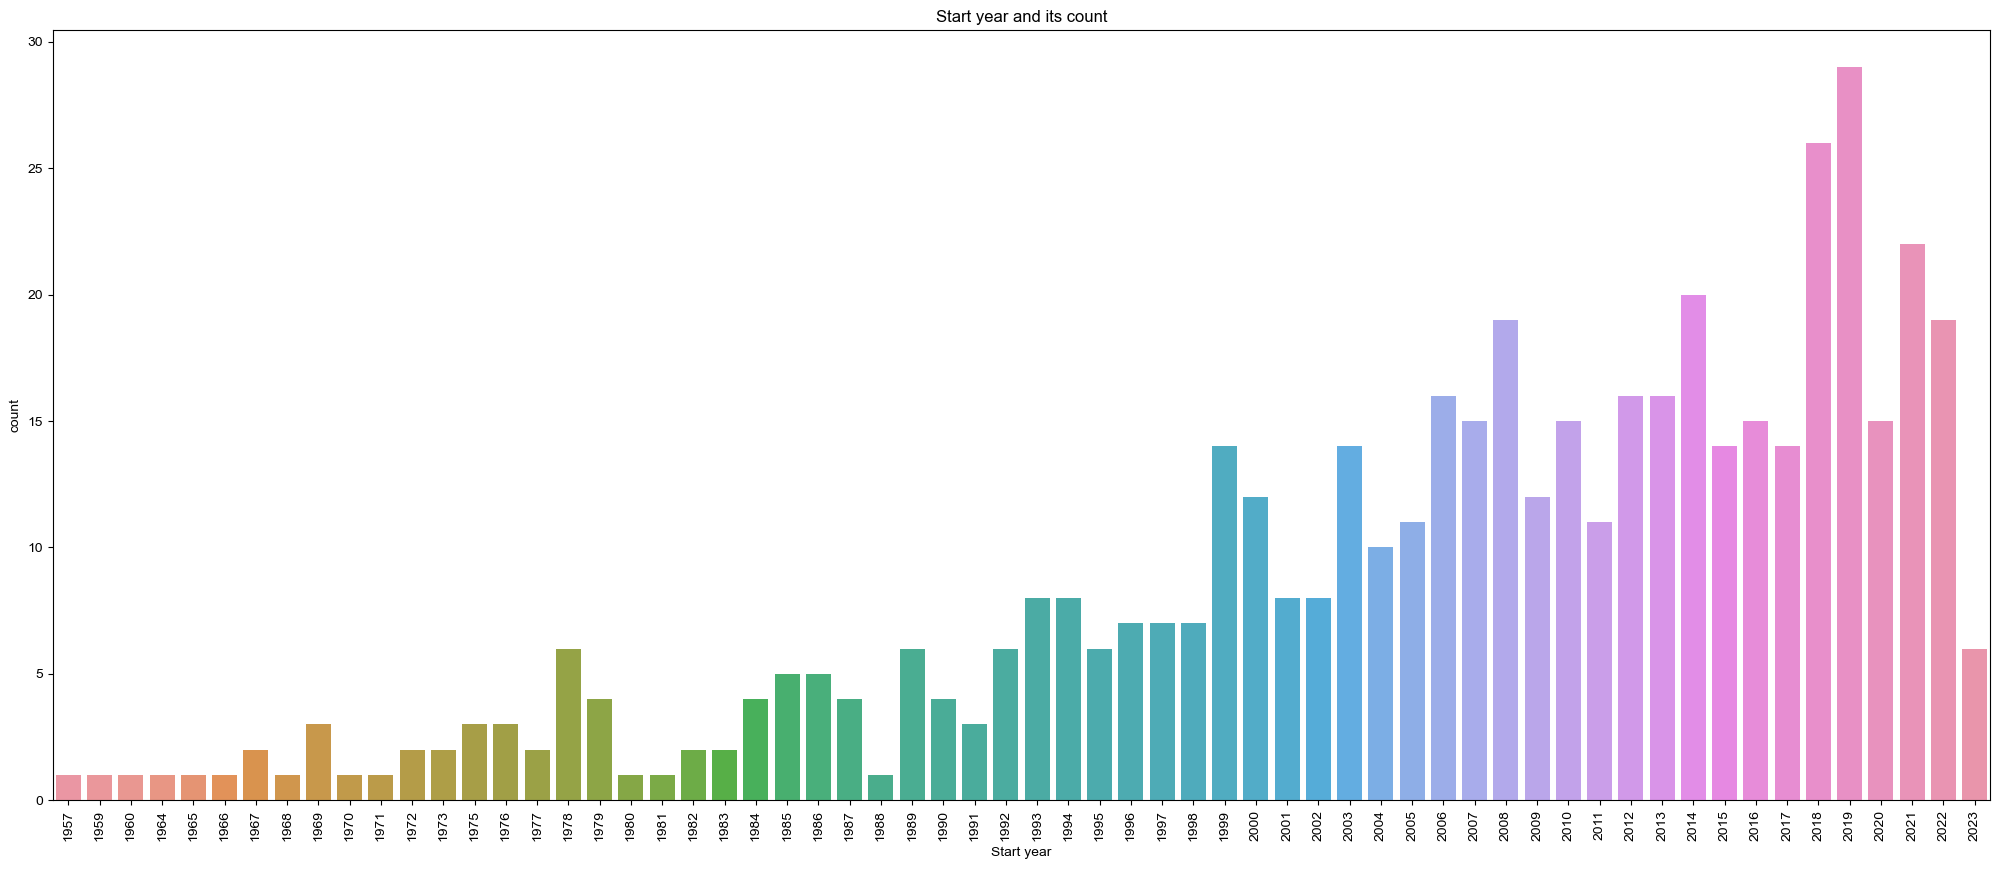

In [206]:
fig, ax = plt.subplots(figsize=(25,10))
sns.countplot('Start year', data=df)
plt.title('Start year and its count')
sns.set(font_scale=1)
plt.xticks(rotation=90);
#This plot shows the number of series released in each year.

# Bi Varient Analysis

Text(0.5, 1.0, 'Highest Ratings with the year of start ')

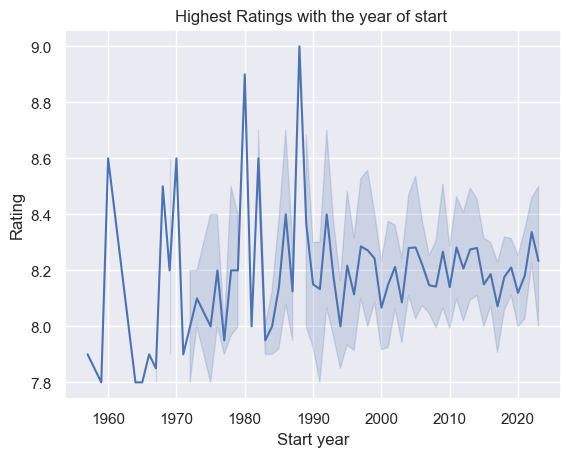

In [208]:
sns.lineplot(x = 'Start year', y = 'Rating', data = df)
plt.title('Highest Ratings with the year of start ')
#highest rating of the show with its year.

In [209]:
# Bivariant : 
# In the above picture we have used Seaborn library i.e line plot  above
# It shows the Highest Rating with respect to start year.
# We can notice that there is a spike in Rating between 1986-1987

In [440]:
top10_len=df.nlargest(10,'Votes')[['Titles','Votes']]
a=top10_len.set_index('Titles')
a
#top 10 series with most votes.

,Votes
Titles,
Rick and Morty,554944
The Simpsons,419074
Attack on Titan,414958
South Park,389624
Family Guy,351498
Death Note,345495
Avatar: The Last Airbender,333861
Futurama,246880
Arcane,231331


Text(0.5, 1.0, 'Top 10 series with respect to votes')

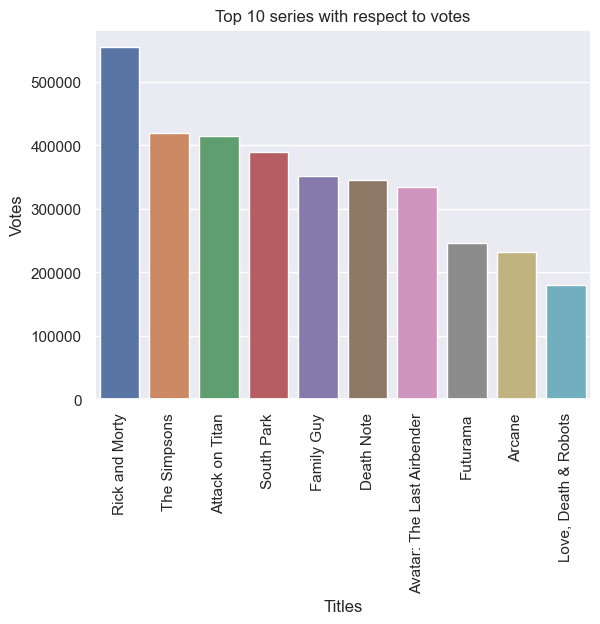

In [214]:
sns.barplot(x=a.index,y='Votes',data=top10_len)
plt.xticks(rotation=90);
plt.title('Top 10 series with respect to votes')
#this plot shows the top 10 series according to votes.

In [ ]:
# Bivariant : 
# In the above picture we have used Seaborn library i.e bar plot  above
# It shows the top 10 series with respect to voting number 
# We can observe that the attack on titan series has most numbers of votes.


In [215]:
top10_len=df.nlargest(10,'Rating')[['Titles','Rating']]
a=top10_len.set_index('Titles')
a
#top 10 titles by its rating.

,Rating
Titles,
Bluey,9.5
Avatar: The Last Airbender,9.3
The Big Lez Show,9.2
Dragon Ball Z Abridged,9.2
Rick and Morty,9.1
Attack on Titan,9.1
Fullmetal Alchemist: Brotherhood,9.1
Bleach: Thousand-Year Blood War,9.1
The Legend of Hanuman,9.1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


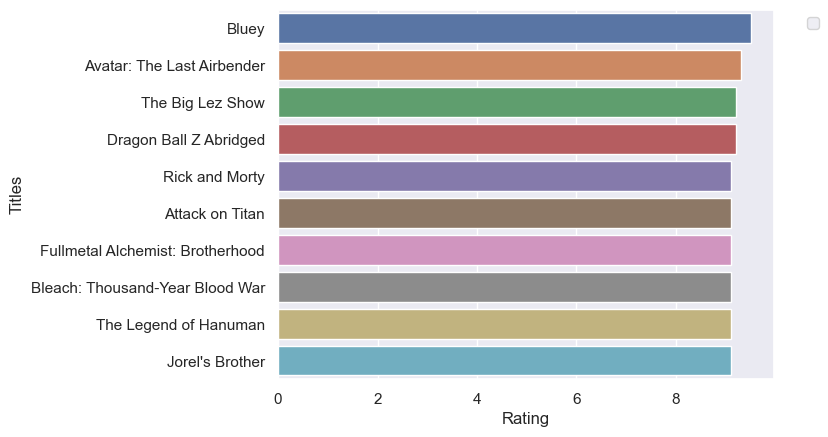

In [216]:
sns.barplot(x='Rating',y=a.index,data=a,dodge=False)
plt.legend(bbox_to_anchor=(1.05,1),loc=2)
#the plot of top 10 shows with their ratings.

In [298]:
top10_len=df.nlargest(10,'Runtime (min)')[['Titles','Runtime (min)']]
a=top10_len.set_index('Titles')
a


,Runtime (min)
Titles,
The Adventures of Tintin,900
Lovely Complex,701
The Road Runner Show,522
Mike Tyson Mysteries,384
Transformers Prime,360
Spy x Family,325
The Boondocks,203
Bob's Burgers,174
Thunderbirds,133


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Top 10 series with runtime')

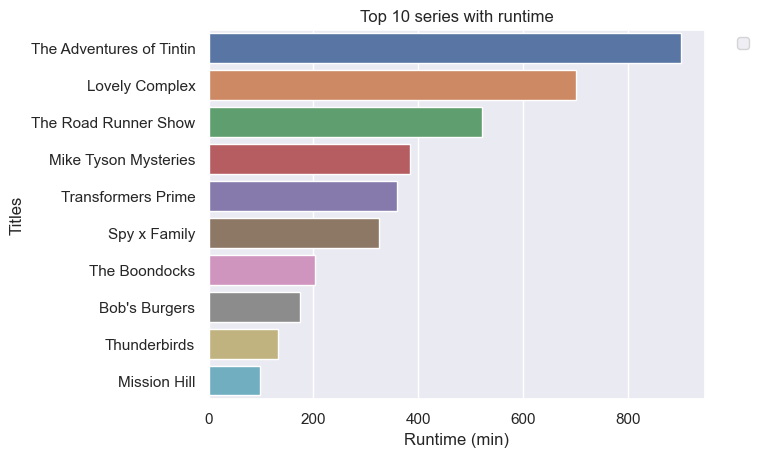

In [299]:
sns.barplot(x='Runtime (min)',y=a.index,data=a,dodge=False)
plt.legend(bbox_to_anchor=(1.05,1),loc=2)
plt.title('Top 10 series with runtime')

In [219]:
# Bivariant : 
# In the above picture we have used Seaborn library i.e bar plot  above
# It shows the top 10 series with respect to runtime, We can observe wolf's Rain has the highest duration in our dataframe.

In [3]:
px.scatter(df,x='Votes',y='Rating',title='Density of votes with respect to Rating')

NameError: name 'px' is not defined

In [302]:
# Bivariant  
# In the above picture we have used plotly library i.e scater plot  above
# It shows the Density of Rating with respect to Votes 
 

Text(0.5, 1.0, 'Density of Votes with respect to runtime')

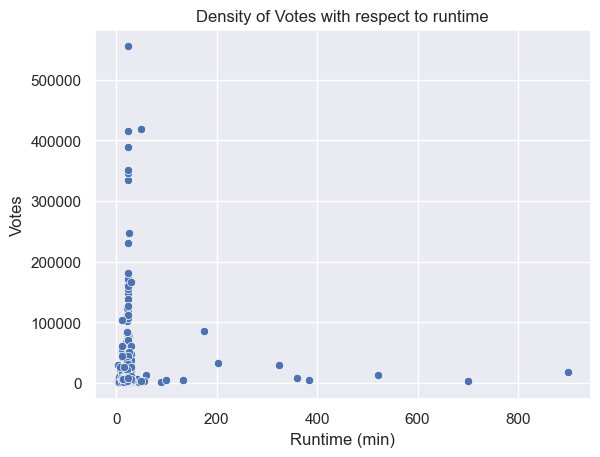

In [310]:
sns.scatterplot(data=df,x='Runtime (min)',y='Votes')
plt.title('Density of Votes with respect to runtime')

In [304]:
# Bivariant
# In the above picture we have used Seaborn library i.e Scatter plot  above
# It shows the density of votes is max beeen 0-100 runtime 
# We can observe that the when the runtime is less it has more number of votes.

In [305]:
sns.scatterplot(data=df,x='Genre',y='Rating')
plt.xticks(rotation=90);
plt.title('Genre v/s Rating')

ValueError: Could not interpret value `Genre` for parameter `x`

In [225]:
# bivariant
# In the above picture we have used Seaborn library i.e Scatter plot  above
# It shows that the series which has Genre Action and adventure has the maximum rating as compared to other Genre 

MULTIVARIENT

Text(0.5, 1.0, 'Coorelation b/w diff. features')

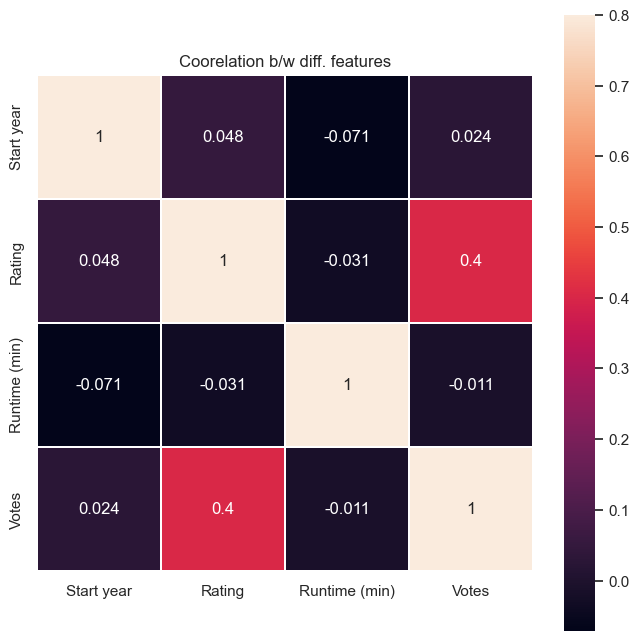

In [226]:
corr = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, vmax=.8, linewidth=.01, square=True, annot=True)
plt.title('Coorelation b/w diff. features')
#heatmap

In [227]:
a=df[df['Votes']>80000]
len(a)

32

<AxesSubplot:xlabel='Rating', ylabel='Votes'>

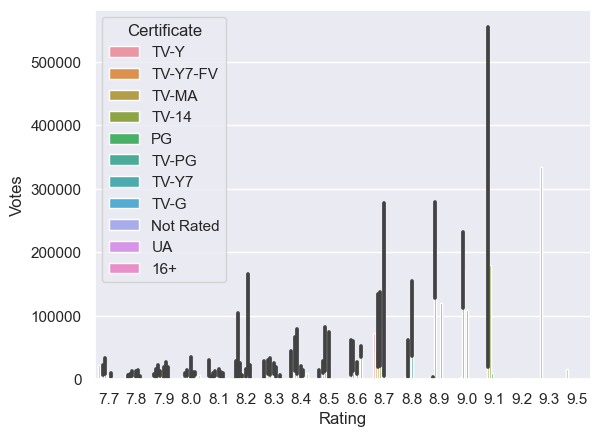

In [444]:
sns.barplot(data=a,x=df['Rating'],y=df['Votes'],hue=df['Certificate'])

In [443]:
# Multivariant
# In the above picture we have used Seaborn library i.e bar plot  above
# It shows that the TV-Y certificate  has maximum numbaer of votes i.e votes increases rating also increases.

In [230]:
df.head(25)

,Titles,Start year,Rating,Runtime (min),Casting,Votes,Certificate,Genre,rating_cat
0,Bluey,2018,9.5,7,"David McCormack, Melanie Zanet...",16331,TV-Y,"Family, Family",Excellent
1,Avatar: The Last Airbender,2005,9.3,23,"Dee Bradley Baker, Zach Tyler ...",333861,TV-Y7-FV,"Action, Adventure",Excellent
2,The Big Lez Show,2012,9.2,10,"Jarrad Wright, Tom Hollis, Cod...",1903,TV-MA,"Adventure, Comedy",Excellent
3,Dragon Ball Z Abridged,2008,9.2,23,"Lawrence Simpson, Nick Landis,...",1249,TV-14,"Action, Comedy",Excellent
4,Rick and Morty,2013,9.1,24,"Justin Roiland, Chris Parnell,...",554944,TV-MA,"Adventure, Comedy",Excellent
5,Attack on Titan,2013,9.1,24,"Josh Grelle, Bryce Papenbrook,...",414958,TV-MA,"Action, Adventure",Excellent
6,Fullmetal Alchemist: Brotherhood,2009,9.1,24,"Kent Williams, Iemasa Kayumi, ...",179881,TV-14,"Action, Adventure",Excellent
7,Bleach: Thousand-Year Blood War,2022,9.1,25,"Masakazu Morita, Johnny Yong B...",19943,TV-MA,"Action, Adventure",Excellent
8,The Legend of Hanuman,2021,9.1,11,"Rich Ting, Da Man, Shakti Sing...",10032,PG,"Adventure, Fantasy",Excellent
9,Jorel's Brother,2014,9.1,41,"Andrei Duarte, Melissa Garcia,...",1157,TV-PG,"Short, Comedy",Excellent


In [231]:
a=df['Titles'].head(10)
a

0                               Bluey
1          Avatar: The Last Airbender
2                    The Big Lez Show
3              Dragon Ball Z Abridged
4                      Rick and Morty
5                     Attack on Titan
6    Fullmetal Alchemist: Brotherhood
7     Bleach: Thousand-Year Blood War
8               The Legend of Hanuman
9                     Jorel's Brother
Name: Titles, dtype: object

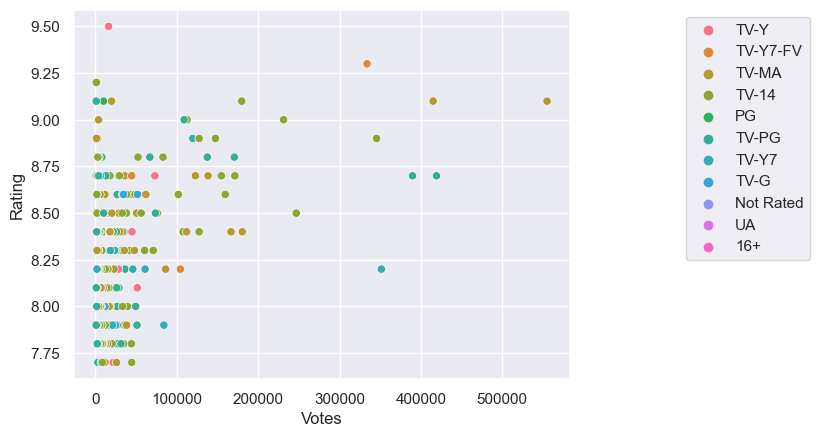

In [232]:
sns.scatterplot(x=df['Votes'],y=df['Rating'],hue=df['Certificate'])
plt.legend(bbox_to_anchor=(1.5,1))
#multivariate scatterplot with rating , votes and Certificate.

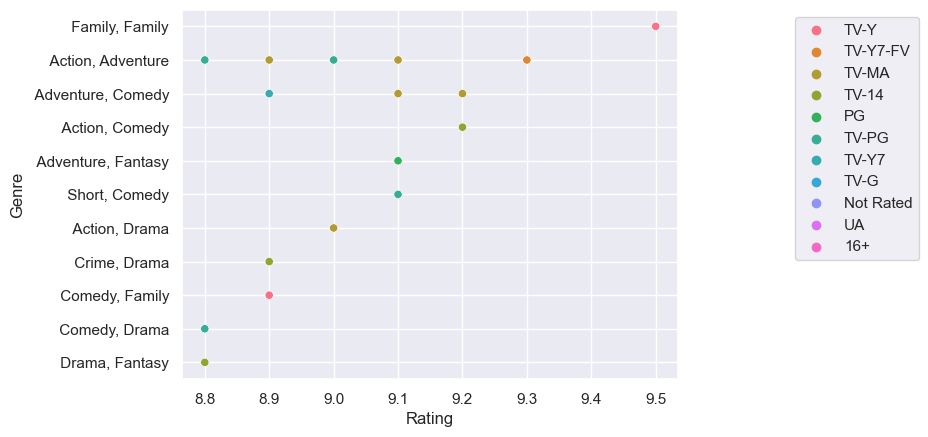

In [235]:
a=df['Genre'].head(25)
sns.scatterplot(x=df['Rating'],y=a,hue=df['Certificate'])
plt.legend(bbox_to_anchor=(1.5,1))
#multivariate of categorical , categorical and numerical.

In [236]:
# multivariant
# In the above picture we have used Seaborn library i.e Scatter plot  above
# It shows that the rating density is more near 50000 votes and rating is increasing as per votes

# Event 1

# If a person wants to watch an Anime Series whose rating is more than 8.5 or above it and the runtime should be less than 25 mins, then these are the top 10 series that he can watch:

In [313]:
df[(df['Rating']>8.5) & (df['Runtime (min)']<24)].head(10)

,Titles,Start year,Rating,Runtime (min),Casting,Votes,Certificate,Genre1,Genre2,rating_cat
0,Bluey,2018,9.5,7,"David McCormack, Melanie Zanet...",16331,TV-Y,Family,Family,Excellent
1,Avatar: The Last Airbender,2005,9.3,23,"Dee Bradley Baker, Zach Tyler ...",333861,TV-Y7-FV,Action,Adventure,Excellent
2,The Big Lez Show,2012,9.2,10,"Jarrad Wright, Tom Hollis, Cod...",1903,TV-MA,Adventure,Comedy,Excellent
3,Dragon Ball Z Abridged,2008,9.2,23,"Lawrence Simpson, Nick Landis,...",1249,TV-14,Action,Comedy,Excellent
8,The Legend of Hanuman,2021,9.1,11,"Rich Ting, Da Man, Shakti Sing...",10032,PG,Adventure,Fantasy,Excellent
11,Hunter x Hunter,2011,9.0,22,"Issei Futamata, Megumi Han, Cr...",112689,TV-14,Action,Adventure,Excellent
12,Batman: The Animated Series,1992,9.0,23,"Kevin Conroy, Loren Lester, Ef...",109089,TV-PG,Action,Adventure,Excellent
15,Gravity Falls,2012,8.9,23,"Jason Ritter, Alex Hirsch, Kri...",119802,TV-Y7,Adventure,Comedy,Excellent
16,Death Note,2006,8.9,23,"Mamoru Miyano, Brad Swaile, Vi...",345495,TV-14,Crime,Drama,Excellent
18,Hey Duggee,2014,8.9,7,"Alexander Armstrong, Jasmine B...",1240,TV-Y,Comedy,Family,Excellent


# let's assume a person wants to compare two series which he manually picked so that he can see which is better to watch

In [275]:
df[df['Titles']=='One Piece']

,Titles,Start year,Rating,Runtime (min),Casting,Votes,Certificate,Genre,rating_cat
14,One Piece,1999,8.9,24,"Mayumi Tanaka, Laurent Vernin,...",147597,TV-14,"Action, Adventure",Excellent


In [276]:
df[df['Titles']=='Death Note']

,Titles,Start year,Rating,Runtime (min),Casting,Votes,Certificate,Genre,rating_cat
16,Death Note,2006,8.9,23,"Mamoru Miyano, Brad Swaile, Vi...",345495,TV-14,"Crime, Drama",Excellent


In [246]:
# user given Votes
votes=int(input())
df[df['Votes']==votes]

19943


,Titles,Start year,Rating,Runtime (min),Casting,Votes,Certificate,Genre,rating_cat
7,Bleach: Thousand-Year Blood War,2022,9.1,25,"Masakazu Morita, Johnny Yong B...",19943,TV-MA,"Action, Adventure",Excellent


In [247]:
# user given Runtime
duration=int(input('Enter the runtime: '))
df[df['Runtime (min)']==duration]

Enter the runtime: 45


,Titles,Start year,Rating,Runtime (min),Casting,Votes,Certificate,Genre,rating_cat
134,Run with the Wind,2018,8.4,45,"Mike Haimoto, Kelly Greenshiel...",1497,TV-14,"Comedy, Sport",Excellent


In [254]:
# user given startyear
year=int(input('Enter the year: '))
df[df['Start year']==year]


Enter the year: 2007


,Titles,Start year,Rating,Runtime (min),Casting,Votes,Certificate,Genre,rating_cat
35,Naruto: Shippuden,2007,8.7,24,"Alexandre Crepet, Junko Takeuc...",138473,TV-MA,"Action, Adventure",Excellent
146,Jefferson Anderson,2007,8.4,24,"Jani Volanen, Kari Hietalahti,...",1639,TV-PG,"Comedy, Crime",Excellent
164,Gurren Lagann,2007,8.3,24,"Tetsuya Kakihara, Shizuka Itô,...",19579,TV-MA,"Action, Adventure",Excellent
218,Shaun the Sheep,2007,8.2,24,"Justin Fletcher, John Sparkes,...",15619,TV-MA,"Short, Comedy",Excellent
226,Baccano!,2007,8.2,11,"Michael C. Pizzuto, J. Michael...",12262,TV-14,"Action, Adventure",Excellent
230,Gyakkyô burai Kaiji,2007,8.2,30,"Jack Stansbury, Masato Hagiwar...",3442,TV-MA,"Action, Thriller",Excellent
233,Moribito: Guardian of the Spirit,2007,8.2,30,"Mabuki Andô, Naoto Adachi, Kôj...",2839,TV-14,"Action, Adventure",Excellent
256,Phineas and Ferb,2007,8.1,24,"Vincent Martella, Dan Povenmir...",51509,TV-Y,"Short, Action",Excellent
290,Mobile Suit Gundam 00,2007,8.1,24,"Sam Vincent, Mamoru Miyano, Sh...",2540,TV-MA,"Action, Drama",Excellent
297,When They Cry: Kai,2007,8.1,10,"Yukari Tamura, Mai Nakahara, M...",2585,TV-MA,"Drama, Horror",Excellent


In [273]:
# user input rating
rating=float(input('Enter the rating: '))
df[df['Rating']==rating]

Enter the rating: 9.1


,Titles,Start year,Rating,Runtime (min),Casting,Votes,Certificate,Genre,rating_cat
4,Rick and Morty,2013,9.1,24,"Justin Roiland, Chris Parnell,...",554944,TV-MA,"Adventure, Comedy",Excellent
5,Attack on Titan,2013,9.1,24,"Josh Grelle, Bryce Papenbrook,...",414958,TV-MA,"Action, Adventure",Excellent
6,Fullmetal Alchemist: Brotherhood,2009,9.1,24,"Kent Williams, Iemasa Kayumi, ...",179881,TV-14,"Action, Adventure",Excellent
7,Bleach: Thousand-Year Blood War,2022,9.1,25,"Masakazu Morita, Johnny Yong B...",19943,TV-MA,"Action, Adventure",Excellent
8,The Legend of Hanuman,2021,9.1,11,"Rich Ting, Da Man, Shakti Sing...",10032,PG,"Adventure, Fantasy",Excellent
9,Jorel's Brother,2014,9.1,41,"Andrei Duarte, Melissa Garcia,...",1157,TV-PG,"Short, Comedy",Excellent


# Suppose a person wants to  get sugggested to watch an anime with his own manual requirements.

In [274]:
votes=int(input('Enter the votes: '))
duration=int(input('Enter the runtime: '))
year=int(input('Enter the year: '))
rating=float(input('Enter the Rating: '))
a=df[(df['Rating']==rating)&(df['Votes']==votes)&(df['Start year']==year)&(df['Runtime (min)']==duration)]
a

Enter the votes: 10032
Enter the runtime: 11
Enter the year: 2021
Enter the Rating: 9.1


,Titles,Start year,Rating,Runtime (min),Casting,Votes,Certificate,Genre,rating_cat
8,The Legend of Hanuman,2021,9.1,11,"Rich Ting, Da Man, Shakti Sing...",10032,PG,"Adventure, Fantasy",Excellent
